In [1]:
!git clone https://github.com/jazzcodes/GestRecog.git

Cloning into 'GestRecog'...
remote: Enumerating objects: 19721, done.
remote: Total 19721 (delta 0), reused 0 (delta 0), pack-reused 19721
Receiving objects: 100% (19721/19721), 1.04 GiB | 20.25 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (40000/40000), done.


In [2]:
import os
files = os.listdir("GestRecog/leapGestRecog")
print(files)

['09', '01', '07', '03', '02', '06', '04', '05', '00', '08']


In [3]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='GestRecog/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')

The different classes that exist in this dataset are:
{'03_fist', '02_l', '10_down', '07_ok', '09_c', '08_palm_moved', '05_thumb', '06_index', '01_palm', '04_fist_moved'}


In [4]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])




print(classes)

{3: 'fist', 2: 'l', 10: 'down', 7: 'ok', 9: 'c', 8: 'palm_moved', 5: 'thumb', 6: 'index', 1: 'palm', 4: 'fist_moved'}


In [5]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))

            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))

# import pandas as pd
# df=pd.DataFrame({'x':x,'y':y})
# df.to_csv('results.csv',index=False)

*** 07 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 05 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 09 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 08 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 04 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 02 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 03 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 01 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 00 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
*** 06 ***
03_fist
02_l
10_down
07_ok
09_c
08_palm_moved
05_thumb
06_index
01_palm
04_fist_moved
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


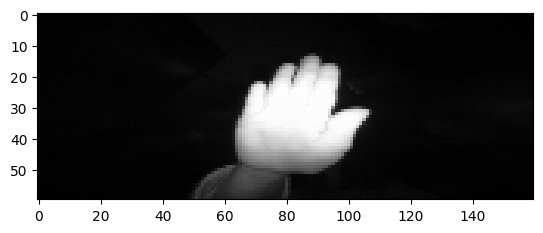

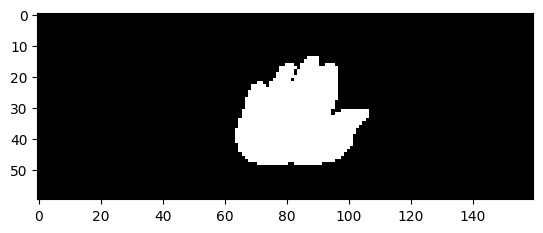

Class Label: 2


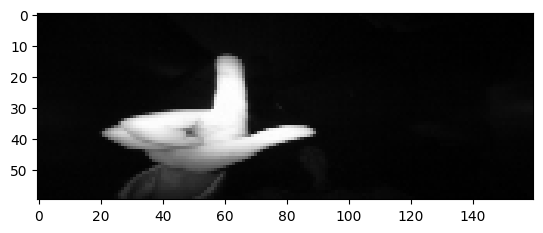

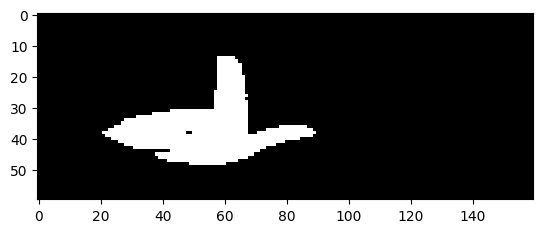

Class Label: 3


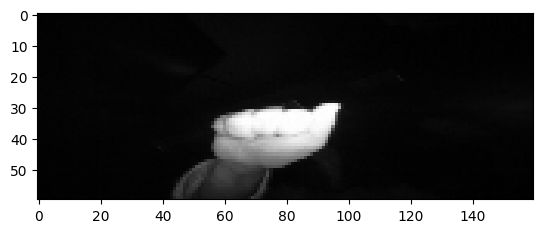

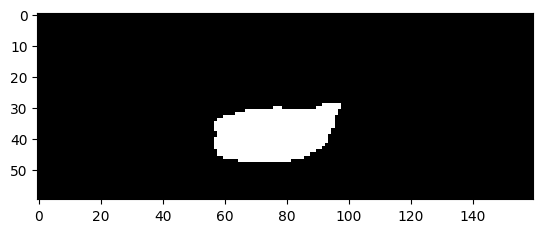

Class Label: 4


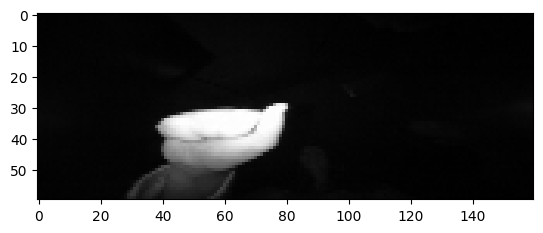

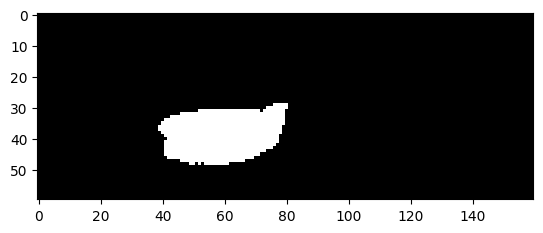

Class Label: 5


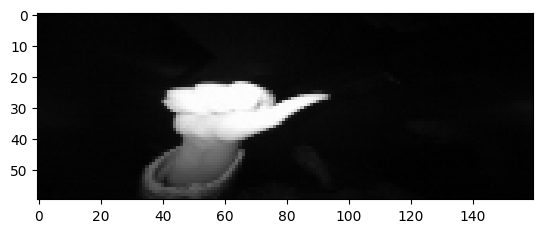

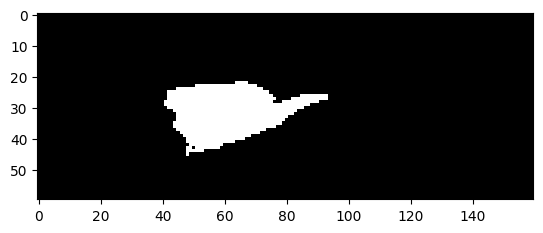

Class Label: 6


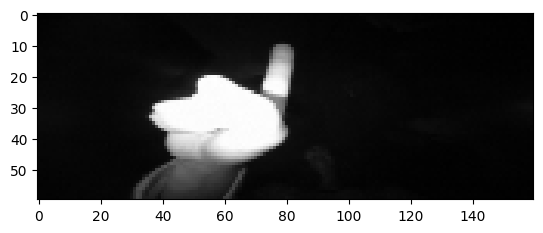

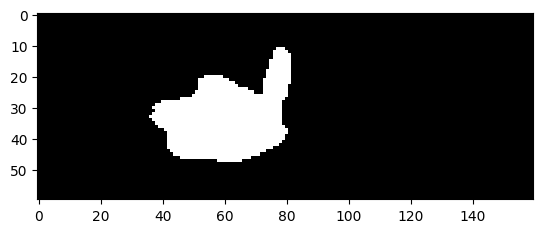

Class Label: 7


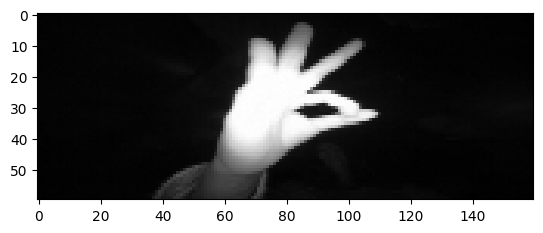

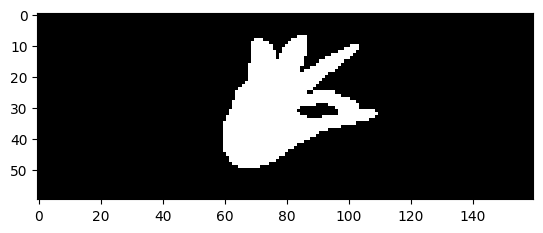

Class Label: 8


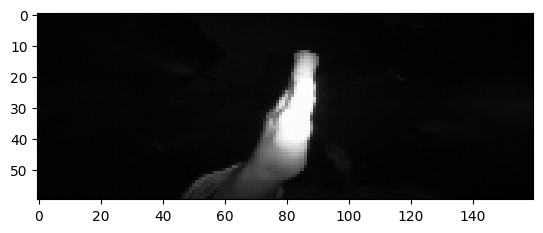

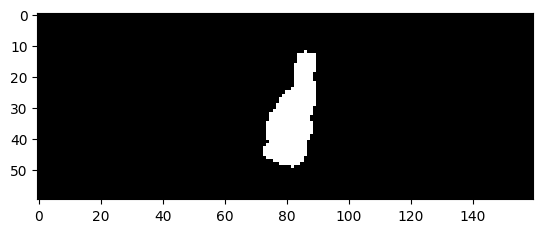

Class Label: 9


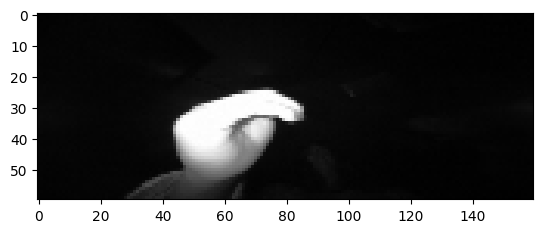

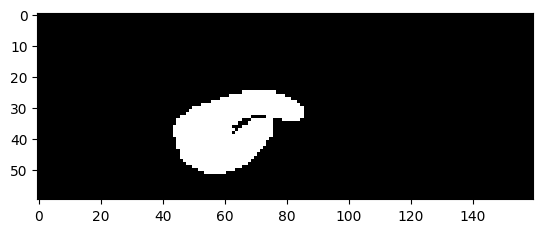

Class Label: 10


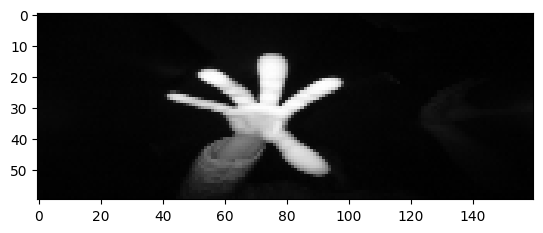

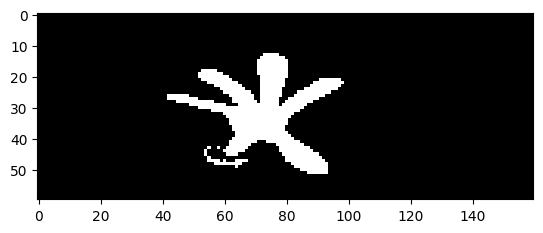

In [6]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)
    plt.show()


In [7]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [8]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
import keras
from keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)



y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

[0 0 1 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [10]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [12]:
from keras import layers
from keras import models

In [13]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
250/250 [==============================] - 61s 241ms/step - loss: 0.4113 - accuracy: 0.8667 - val_loss: 0.0090 - val_accuracy: 0.9995
Epoch 2/10
250/250 [==============================] - 58s 231ms/step - loss: 0.0242 - accuracy: 0.9934 - val_loss: 5.2413e-04 - val_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 57s 227ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 1.4176e-04 - val_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 56s 225ms/step - loss: 0.0069 - accuracy: 0.9988 - val_loss: 1.4854e-04 - val_accuracy: 1.0000
Epoch 5/10
250/250 [==============================] - 59s 236ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 4.5695e-04 - val_accuracy: 0.9995
Epoch 6/10
250/250 [==============================] - 58s 234ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 2.8247e-05 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 57s 228ms/step - loss: 0.0019 - accuracy: 0.9994 - val_l

In [15]:
model.save('cnn_results.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 2s 29ms/step - loss: 6.7523e-05 - accuracy: 1.0000
Accuracy:1.0


In [17]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
x_data=list(x_data)
for i in range(len(x_data)):
    x_data[i]=x_data[i].flatten()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_data=np.array(x_data)
x_data=pca.fit_transform(x_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.25498139 0.08075452 0.06690615 0.041779  ]
[5.99919819 3.37615501 3.07306668 2.42838763]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y,test_size = 0.2)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_further)

In [21]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
y_train_score_sgd=sgd.predict(X_train)
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_sgd, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_sgd, normalize=True, sample_weight=None))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.24975
Train 0.2438125


In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [23]:
y_pred_knn = classifier.predict(X_test)

In [24]:
y_train_score_knn=classifier.predict(X_train)

In [25]:
from sklearn.metrics import accuracy_score
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_knn, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_knn, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.97125
Train 0.9798125


In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)

In [27]:
y_pred_dt=clf.predict(X_test)
y_train_score_dt=clf.predict(X_train)

In [28]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_dt, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_dt, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.8405
Train 0.8736875


In [29]:
from sklearn.ensemble import RandomForestClassifier
clf_rft = RandomForestClassifier(n_estimators=100, max_depth=15,random_state=0)
clf_rft = clf_rft.fit(X_train, y_train)

<ipython-input-29-a1f37dac80f9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rft = clf_rft.fit(X_train, y_train)


In [30]:
y_pred_rft=clf_rft.predict(X_test)
y_train_score_rft=clf_rft.predict(X_train)

In [31]:
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_rft, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_rft, normalize=True, sample_weight=None))

accuracy of the model is:
Test  0.972
Train 0.9965625


In [34]:
from sklearn.neural_network import MLPClassifier

ann_clf = MLPClassifier()
ann_clf.fit(X_train, y_train)
y_pred_ann=ann_clf.predict(X_test)
y_train_score_ann=ann_clf.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_ann, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_ann, normalize=True, sample_weight=None))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.86725
Train 0.87575


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
from sklearn.svm import SVC
svm_model_rbf = SVC(kernel = 'rbf', C = 10,probability=True).fit(X_train, y_train)
y_pred_svm=svm_model_rbf.predict(X_test)
y_train_score_svm=svm_model_rbf.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_svm, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_svm, normalize=True, sample_weight=None))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.8935
Train 0.8999375


In [38]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('ann',ann_clf),('clf_rft',clf_rft),('dt',clf),('sv',svm_model_rbf),('knn',classifier)],voting='soft')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_train_score=model.predict(X_train)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score, normalize=True, sample_weight=None))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy of the model is:
Test  0.9625
Train 0.977


In [39]:
stacking_xtest=[[y_pred_svm[i],y_pred[i],y_pred_ann[i],y_pred_rft[i],y_pred_dt[i]] for i in range(len(X_test))]
stacking_xtrain=[[y_train_score_svm[i],y_train_score[i],y_train_score_ann[i],y_train_score_rft[i],y_train_score_dt[i]] for i in range(len(X_train))]


ann_stacking = MLPClassifier()
ann_stacking.fit(stacking_xtrain, y_train)
y_pred_stacking=ann_stacking.predict(stacking_xtest)
y_train_score_stacking=ann_stacking.predict(stacking_xtrain)
print("accuracy of the model is:\nTest ", accuracy_score(y_further, y_pred_stacking, normalize=True, sample_weight=None))
print('Train',accuracy_score(y_train, y_train_score_stacking, normalize=True, sample_weight=None))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of the model is:
Test  0.97175
Train 0.996625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
